Лабораторна робота N4

Структури для роботи з великими обсягами

даних в Python

Мета: отримати навички роботи із структурами для зберігання в Python
(python, numpy, pandas, numpy array, dataframe, timeit)

Перший рівень

In [25]:
import numpy as np
import pandas as pd

file_path = "household_power_consumption.txt"
df_pandas = pd.read_csv(
    file_path,
    sep=";",
    na_values="?",
    dtype={
        "Date": str,
        "Time": str,
        "Global_active_power": float,
        "Global_reactive_power": float,
        "Voltage": float,
        "Global_intensity": float,
        "Sub_metering_1": float,
        "Sub_metering_2": float,
        "Sub_metering_3": float
    },
    low_memory=False
)
df_pandas.dropna(inplace=True)
print("Pandas DataFrame:")
print(df_pandas.head())


Pandas DataFrame:
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [26]:
types = [
    ("Date", "U10"),
    ("Time", "U8"),
    ("Global_active_power", "float64"),
    ("Global_reactive_power", "float64"),
    ("Voltage", "float64"),
    ("Global_intensity", "float64"),
    ("Sub_metering_1", "float64"),
    ("Sub_metering_2", "float64"),
    ("Sub_metering_3", "float64")
]

df_numpy = np.genfromtxt(
    file_path,
    delimiter=';',
    dtype=types,
    encoding="UTF-8",
    names=True,
    missing_values="?",
    filling_values=np.nan
)
df_numpy = df_numpy[~np.isnan(df_numpy["Global_active_power"])]

print("\nNumPy Array:")
print(df_numpy[:5])


NumPy Array:
[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.)
 ('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)]


1.Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт.


In [27]:
filtered_pandas_1 = df_pandas[df_pandas["Global_active_power"] > 5]
filtered_numpy_1 = df_numpy[df_numpy["Global_active_power"] > 5]
print(f"Кількість записів, де потужність > 5 кВт (Pandas): {len(filtered_pandas_1)}")
print(f"Кількість записів, де потужність > 5 кВт (NumPy): {len(filtered_numpy_1)}")

Кількість записів, де потужність > 5 кВт (Pandas): 17547
Кількість записів, де потужність > 5 кВт (NumPy): 17547



2. Обрати всі записи, у яких вольтаж перевищую 235 В.


In [28]:
filtered_pandas_2 = df_pandas[df_pandas["Voltage"] > 235]
filtered_numpy_2 = df_numpy[df_numpy["Voltage"] > 235]

print(f"Кількість записів, де вольтаж > 235 В (Pandas): {len(filtered_pandas_2)}")
print(f"Кількість записів, де вольтаж > 235 В (NumPy): {len(filtered_numpy_2)}")

Кількість записів, де вольтаж > 235 В (Pandas): 1952491
Кількість записів, де вольтаж > 235 В (NumPy): 1952491


3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [29]:
filtered_pandas_3 = df_pandas[
    (df_pandas["Global_intensity"] >= 19) & (df_pandas["Global_intensity"] <= 20)
]
filtered_numpy_3 = df_numpy[
    (df_numpy["Global_intensity"] >= 19) & (df_numpy["Global_intensity"] <= 20)
]
# Додатковий фільтр: пральна машина + холодильник > бойлер + кондиціонер
filtered_pandas_3_extra = filtered_pandas_3[
    filtered_pandas_3["Sub_metering_2"] > filtered_pandas_3["Sub_metering_3"]
]
filtered_numpy_3_extra = filtered_numpy_3[
    filtered_numpy_3["Sub_metering_2"] > filtered_numpy_3["Sub_metering_3"]
]
print(f"Кількість записів, де сила струму в межах 19-20 А (Pandas): {len(filtered_pandas_3)}")
print(f"Кількість записів, де сила струму в межах 19-20 А (NumPy): {len(filtered_numpy_3)}")
print(f"Кількість записів, де пральна машина + холодильник > бойлер + кондиціонер (Pandas): {len(filtered_pandas_3_extra)}")
print(f"Кількість записів, де пральна машина + холодильник > бойлер + кондиціонер (NumPy): {len(filtered_numpy_3_extra)}")

Кількість записів, де сила струму в межах 19-20 А (Pandas): 7021
Кількість записів, де сила струму в межах 19-20 А (NumPy): 7021
Кількість записів, де пральна машина + холодильник > бойлер + кондиціонер (Pandas): 2509
Кількість записів, де пральна машина + холодильник > бойлер + кондиціонер (NumPy): 2509


4. Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії


In [30]:
random_indices = np.random.choice(df_pandas.index, size=500000, replace=False)

random_sample = df_pandas.loc[random_indices]

average_sub_metering_1 = random_sample["Sub_metering_1"].mean()
average_sub_metering_2 = random_sample["Sub_metering_2"].mean()
average_sub_metering_3 = random_sample["Sub_metering_3"].mean()

print("Pandas")
print(f"Середнє значення Sub_metering_1: {average_sub_metering_1}")
print(f"Середнє значення Sub_metering_2: {average_sub_metering_2}")
print(f"Середнє значення Sub_metering_3: {average_sub_metering_3}")

Pandas
Середнє значення Sub_metering_1: 1.12516
Середнє значення Sub_metering_2: 1.291226
Середнє значення Sub_metering_3: 6.46735


In [31]:
random_indices = np.random.choice(df_numpy.shape[0], size=500000, replace=False)

random_sample = df_numpy[random_indices]

average_sub_metering_1 = np.mean(random_sample["Sub_metering_1"])
average_sub_metering_2 = np.mean(random_sample["Sub_metering_2"])
average_sub_metering_3 = np.mean(random_sample["Sub_metering_3"])

print("NumPy")
print(f"Середнє значення Sub_metering_1: {average_sub_metering_1}")
print(f"Середнє значення Sub_metering_2: {average_sub_metering_2}")
print(f"Середнє значення Sub_metering_3: {average_sub_metering_3}")

NumPy
Середнє значення Sub_metering_1: 1.12614
Середнє значення Sub_metering_2: 1.295162
Середнє значення Sub_metering_3: 6.460876


5.Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [32]:
after_18 = np.array([int(time[:2]) >= 18 for time in df_numpy["Time"]])
df_numpy = df_numpy[after_18]
df_numpy = df_numpy[df_numpy["Global_active_power"] > 6]
sub1 = df_numpy["Sub_metering_1"]
sub2 = df_numpy["Sub_metering_2"]
sub3 = df_numpy["Sub_metering_3"]
group2 = sub1 + sub2 + sub3
total = df_numpy["Global_active_power"] * 1000 / 60
df_numpy = df_numpy[group2 > (total / 2)]
half = len(df_numpy) // 2
first_half = df_numpy[:half][::3]
second_half = df_numpy[half:][::4]
final_numpy = np.concatenate([first_half, second_half])

print("NumPy")
print(final_numpy[:5])

NumPy
[('16/12/2006', '18:05:00', 6.052, 0.192, 232.93, 26.2,  0., 37., 17.)
 ('23/12/2006', '23:45:00', 6.138, 0.086, 239.95, 26. , 38.,  0., 17.)
 ('25/12/2006', '21:49:00', 6.362, 0.   , 235.59, 27. , 37., 32., 17.)
 ('25/12/2006', '21:54:00', 6.428, 0.132, 234.19, 27.6, 37., 26., 17.)
 ('28/12/2006', '21:00:00', 6.376, 0.252, 235.94, 27.4,  1., 53., 17.)]


In [33]:
df_pandas["Hour"] = df_pandas["Time"].str[:2].astype(int)
df = df_pandas[df_pandas["Hour"] >= 18]
df = df[df["Global_active_power"] > 6]
df["Total_energy"] = df["Global_active_power"] * 1000 / 60
df["Group2"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]
df = df[df["Group2"] > (df["Total_energy"] / 2)]
half = len(df) // 2
first_half = df.iloc[:half]
second_half = df.iloc[half:]
result = pd.concat([first_half.iloc[::3], second_half.iloc[::4]])
selected_columns = result.iloc[:, [0, 1, 2, -1]]

print("Pandas")
print(selected_columns.head())

Pandas
             Date      Time  Global_active_power  Group2
41     16/12/2006  18:05:00                6.052    54.0
10461  23/12/2006  23:45:00                6.138    55.0
13225  25/12/2006  21:49:00                6.362    86.0
13230  25/12/2006  21:54:00                6.428    80.0
17496  28/12/2006  21:00:00                6.376    71.0


Другий рівень (ускладнений)


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
df = pd.read_csv("adult.data", names=columns, na_values=" ?", skipinitialspace=True)
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

Поборотися із зниклими даними.

In [35]:
df[['native-country', 'occupation', 'workclass']] = df[['native-country', 'occupation', 'workclass']].replace(
    {"?": np.nan, "Unknown": np.nan, "": np.nan}
)
print(f"До очищення:\n {df.isnull().sum()}")
for column in ['workclass', 'occupation', 'native-country']:
    most_frequent = df[column].mode()[0]
    df[column] = df[column].fillna(most_frequent)
print(f"Після очищення:\n {df.isnull().sum()}")

До очищення:
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
Після очищення:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Пронормувати вибраний датасет або стандартизувати його

In [36]:
def normalize_df(df):
    return (df - df.min()) / (df.max() - df.min())


def standardize_df(df):
    return (df - df.mean()) / df.std()


df_numeric = df.select_dtypes(include=[np.number])
normalized_df = normalize_df(df_numeric)
standardized_df = standardize_df(df_numeric)

print("Normalized min:", normalized_df.min().min())
print("Normalized max:", normalized_df.max().max())

print("Standardized mean:", standardized_df.mean().mean())
print("Standardized std:", standardized_df.std().mean())

Normalized min: 0.0
Normalized max: 1.0
Standardized mean: 6.510198791041324e-18
Standardized std: 1.0000000000000762


Згідно з результатами нормалізації, для кожної змінної в даних було виконано перетворення значень у певний діапазон (між 0 та 1 ).Це означає, що тепер всі ці змінні перебувають у однаковому діапазоні, що робить їх більш зручними для подальшого аналізу або моделювання.

Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

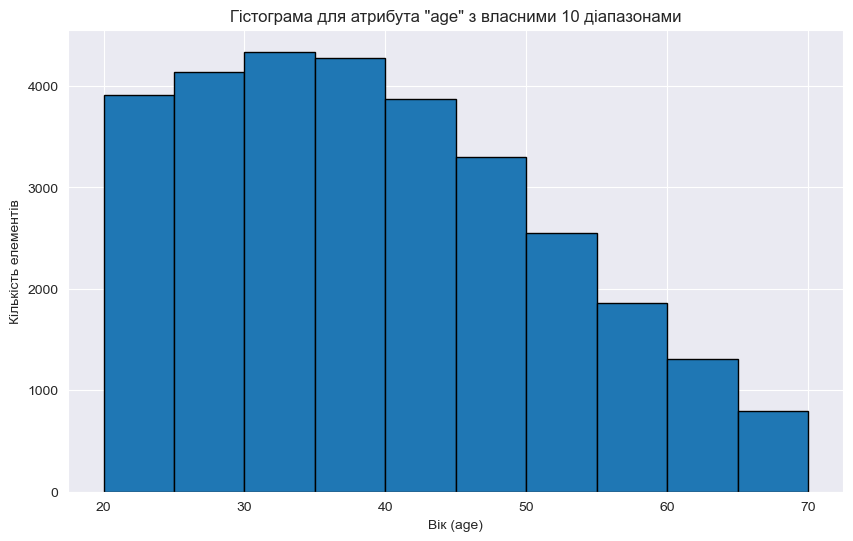

In [37]:
plt.figure(figsize=(10, 6))
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
plt.hist(df['age'], bins=bins, edgecolor='black')
plt.title('Гістограма для атрибута "age" з власними 10 діапазонами')
plt.xlabel('Вік (age)')
plt.ylabel('Кількість елементів')
plt.show()

Гістограма показує розподіл віку у вибірці, поділеному на 10 інтервалів. Найбільше людей у віці 25–40 років, після чого кількість поступово зменшується. Найменше — у віці 65–70. Дані мають зміщення вліво, тобто більшість — молодші особи.

Збудувати графік залежності одного integer/real атрибута від іншого.

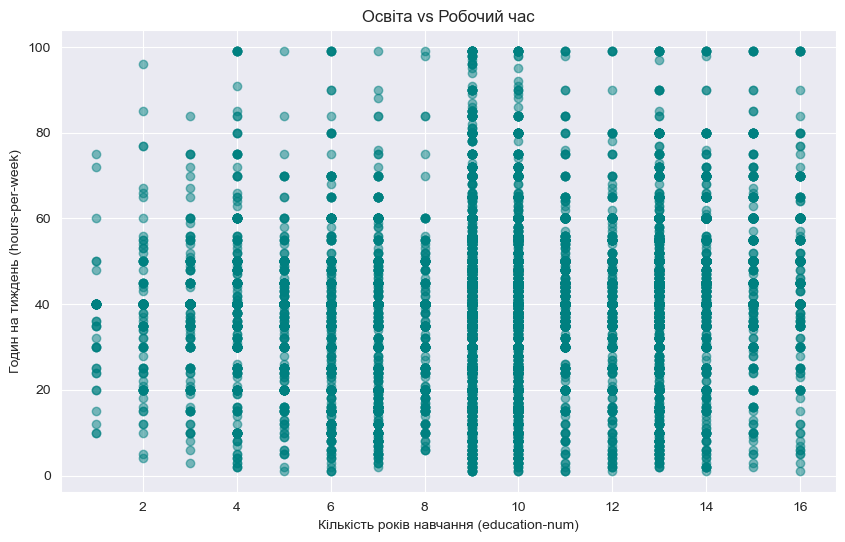

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['education-num'], df['hours-per-week'], alpha=0.5, color='teal')
plt.xlabel('Кількість років навчання (education-num)')
plt.ylabel('Годин на тиждень (hours-per-week)')
plt.title('Освіта vs Робочий час')
plt.grid(True)
plt.show()


Більшість людей працюють 40 год/тиждень — це помітно як вертикальні скупчення біля значення 40 на осі Y.

Освіта не сильно впливає на кількість годин — розкид годин виглядає схожим майже для всіх рівнів освіти.

Навіть при найвищій освіті (16 років) є ті, хто працює 20, 40, 60+ годин — отже, немає чіткої залежності.

Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [39]:
x = df['education-num']
y = df['hours-per-week']

#Коефіцієнт Пірсона
pearson_corr, p_pearson = pearsonr(x, y)
# Коефіцієнт Спірмена
spearman_corr, p_spearman = spearmanr(x, y)

print(f"Коефіцієнт Пірсона: {pearson_corr:.4f}, p-value: {p_pearson:.2e}")
print(f"Коефіцієнт Спірмена: {spearman_corr:.4f}, p-value: {p_spearman:.2e}")

Коефіцієнт Пірсона: 0.1481, p-value: 4.24e-159
Коефіцієнт Спірмена: 0.1672, p-value: 8.30e-203


Обчислює зв’язок між двома числовими змінними з датафрейму :

education-num — кількість років формальної освіти (або умовний рівень освіти),

hours-per-week — скільки годин на тиждень працює людина.

Коефіцієнт Пірсона: 0.1481 — це слабкий позитивний лінійний зв’язок, тобто загалом: чим вища освіта, тим трохи більше люди працюють.
Коефіцієнт Спірмена: 0.1672 — теж слабкий позитивний зв’язок, але трохи сильніший, ніж за Пірсоном. Це означає: загальна тенденція така ж — зростання одного значення відповідає зростанню іншого, навіть якщо зв’язок не ідеально лінійний

Висновок:
Люди з вищим рівнем освіти трохи частіше працюють більше годин на тиждень. Але зв’язок слабкий — є багато винятків. Обидва коефіцієнти це підтверджують, і результат є статистично значущим

Провести One Hot Encoding категоріального string атрибуту.

In [40]:
categorical_cols = ['sex', 'income']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

print(df_encoded.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  capital-gain  \
0       Never-married       Adm-clerical  Not-in-family  White          2174   
1  Married-civ-spouse    Exec-managerial        Husband  White             0   
2            Divorced  Handlers-cleaners  Not-in-family  White             0   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black             0   
4  Married-civ-spouse     Prof-specialty           Wife  Black             0   

   capital-loss  hours-per-week native-country  sex_Female  sex_Male  \
0             0              40  United-States         0.0       1.0   
1 

Провести візуалізацію багатовимірних даних

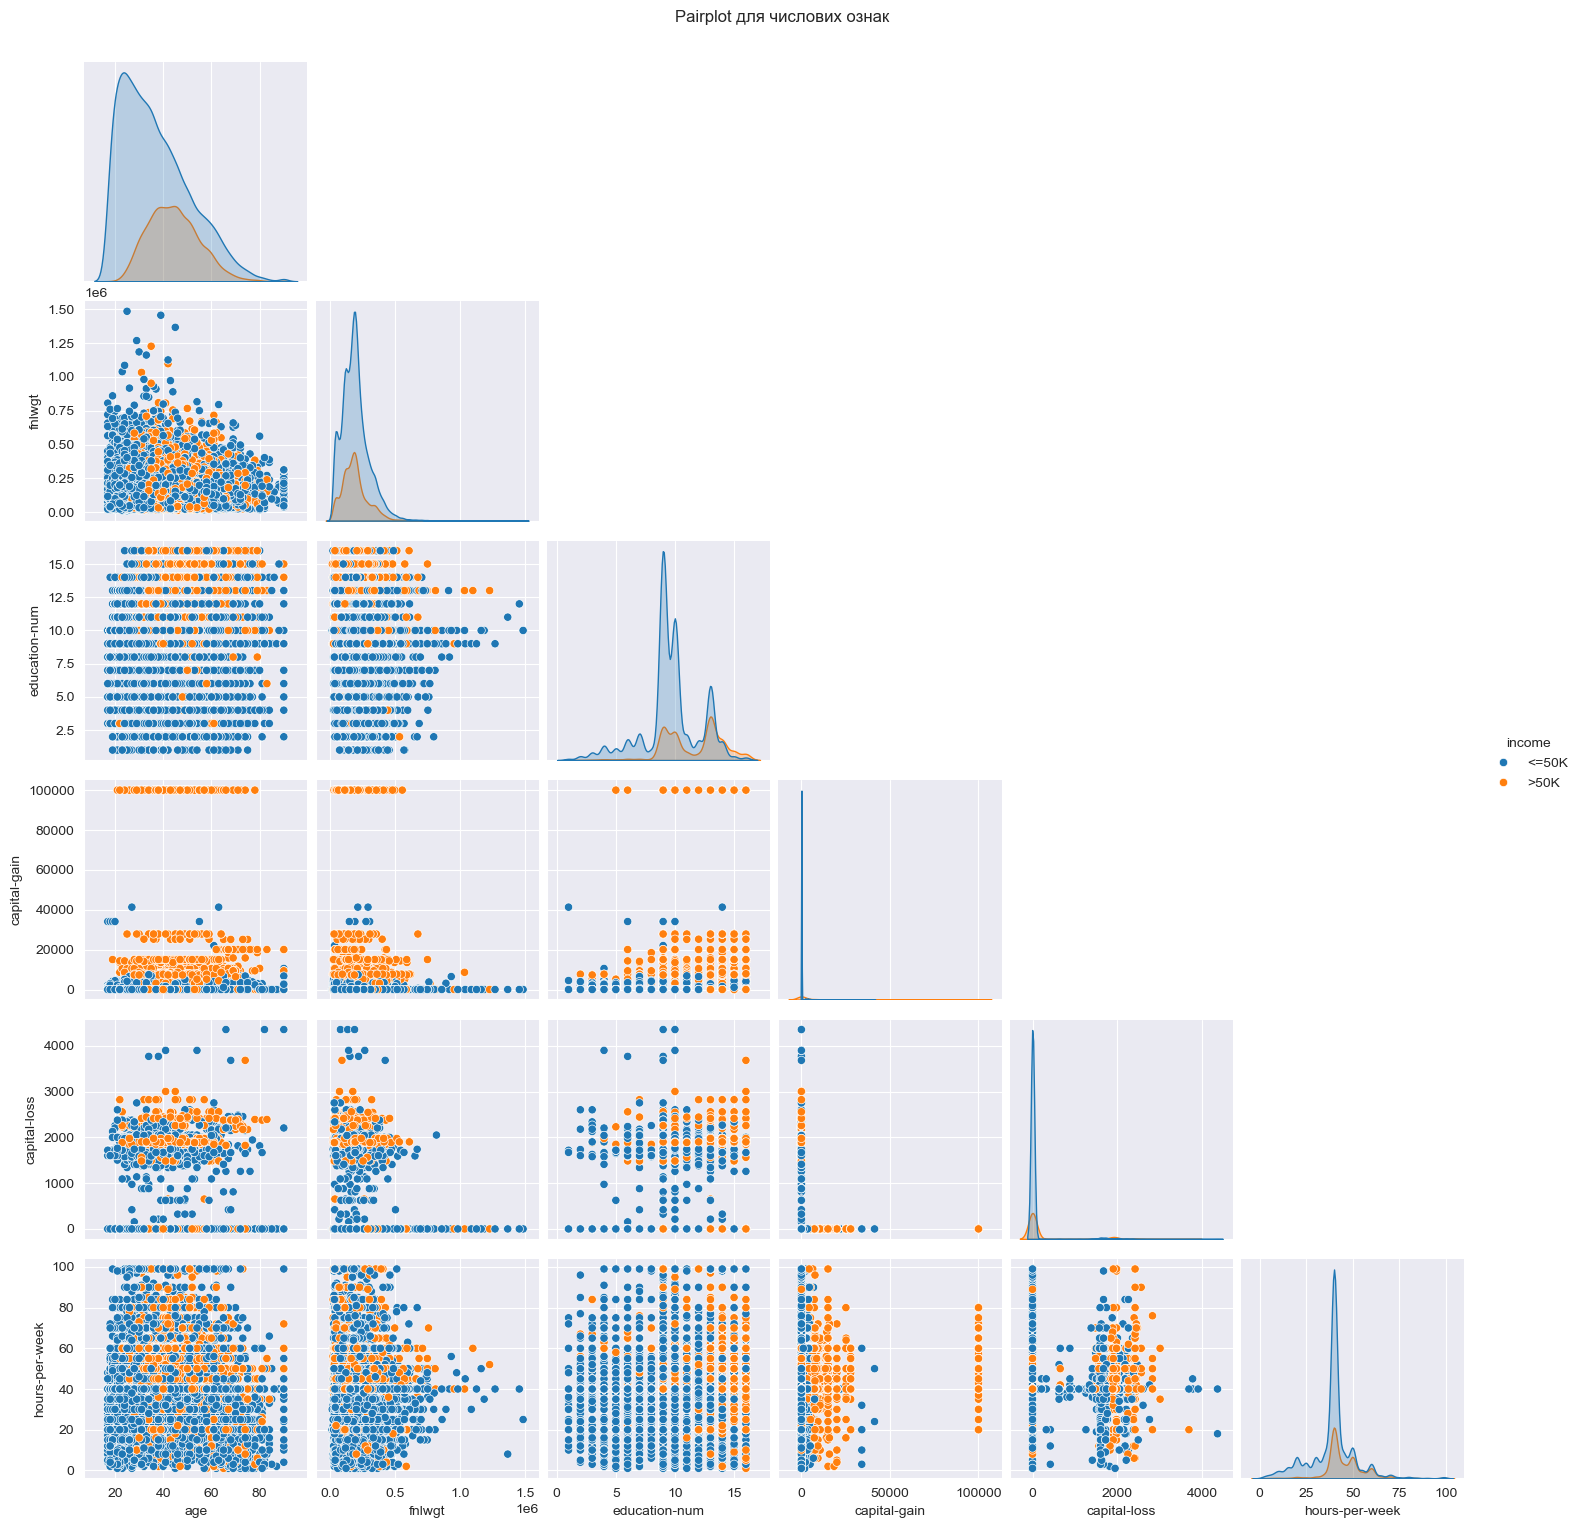

In [41]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(numeric_df.join(df['income']), hue='income', corner=True)
plt.suptitle('Pairplot для числових ознак', y=1.02)
plt.show()

Проаналізовано взаємозв’язки між числовими змінними датасету та їхній вплив на рівень доходу (income). Візуалізація показала, що деякі ознаки, зокрема education-num, capital-gain, hours-per-week та age, мають певну кореляцію з доходом — зокрема, особи з більшим доходом (>50K) частіше мають вищий рівень освіти, більше працюють і мають додаткові капітальні прибутки. Більшість змінних мають скупчення значень, а окремі — виражені викиди (особливо capital-gain і capital-loss). Видимий розподіл класів вказує, що дані можуть бути використані для класифікації, хоча межа між класами не є ідеально чіткою.